In [2]:
import pandas as pd
import numpy as np
import sklearn

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../../Datasets/RealEstatePrices.csv', index_col='No')

In [4]:
df.head(5)

,Type,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,TradePrice,FloorPlan,FrontageIsGreaterFlag,BuildingYear,Structure,Use,Purpose,CityPlanning,CoverageRatio,FloorAreaRatio,Year,Renovation
No,,,,,,,,,,,,,,,,,,,
1,"Pre-owned Condominiums, etc.",13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,40000000,1LDK,False,2013.0,RC,House,House,Commercial Zone,80.0,500.0,2019,Not yet
2,"Pre-owned Condominiums, etc.",13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,130000000,3LDK,False,2007.0,RC,NaN,Other,Commercial Zone,80.0,500.0,2019,Done
3,Residential Land(Land and Building),13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,2,400000000,NaN,False,2018.0,S,"Office, Shop",Shop,Commercial Zone,80.0,500.0,2019,NaN
4,Residential Land(Land and Building),13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,1,180000000,NaN,False,1976.0,RC,"Housing Complex, Office",NaN,Commercial Zone,80.0,700.0,2019,NaN
5,"Pre-owned Condominiums, etc.",13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,100000000,2LDK,False,2007.0,RC,House,House,Commercial Zone,80.0,500.0,2019,Done


# 1. Data preparation

In [5]:
len(df)

406575

In [6]:
# to make columns consistent
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(3)

,type,municipalitycode,prefecture,municipality,districtname,neareststation,timetoneareststation,tradeprice,floorplan,frontageisgreaterflag,buildingyear,structure,use,purpose,cityplanning,coverageratio,floorarearatio,year,renovation
No,,,,,,,,,,,,,,,,,,,
1,"Pre-owned Condominiums, etc.",13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,40000000,1LDK,False,2013.0,RC,House,House,Commercial Zone,80.0,500.0,2019,Not yet
2,"Pre-owned Condominiums, etc.",13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,130000000,3LDK,False,2007.0,RC,NaN,Other,Commercial Zone,80.0,500.0,2019,Done
3,Residential Land(Land and Building),13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,2,400000000,NaN,False,2018.0,S,"Office, Shop",Shop,Commercial Zone,80.0,500.0,2019,NaN


In [7]:
# now let's make all the data consistent as well
cols = list(df.dtypes[df.dtypes == 'object'].index)

for col in cols:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [8]:
df.head(5)

,type,municipalitycode,prefecture,municipality,districtname,neareststation,timetoneareststation,tradeprice,floorplan,frontageisgreaterflag,buildingyear,structure,use,purpose,cityplanning,coverageratio,floorarearatio,year,renovation
No,,,,,,,,,,,,,,,,,,,
1,"pre-owned_condominiums,_etc.",13101,tokyo,chiyoda_ward,iidabashi,iidabashi,4,40000000,1ldk,False,2013.0,rc,house,house,commercial_zone,80.0,500.0,2019,not_yet
2,"pre-owned_condominiums,_etc.",13101,tokyo,chiyoda_ward,iidabashi,iidabashi,4,130000000,3ldk,False,2007.0,rc,NaN,other,commercial_zone,80.0,500.0,2019,done
3,residential_land(land_and_building),13101,tokyo,chiyoda_ward,iidabashi,iidabashi,2,400000000,NaN,False,2018.0,s,"office,_shop",shop,commercial_zone,80.0,500.0,2019,NaN
4,residential_land(land_and_building),13101,tokyo,chiyoda_ward,iidabashi,iidabashi,1,180000000,NaN,False,1976.0,rc,"housing_complex,_office",NaN,commercial_zone,80.0,700.0,2019,NaN
5,"pre-owned_condominiums,_etc.",13101,tokyo,chiyoda_ward,iidabashi,iidabashi,4,100000000,2ldk,False,2007.0,rc,house,house,commercial_zone,80.0,500.0,2019,done


In [91]:
df.dtypes

type                      object
municipalitycode           int64
prefecture                object
municipality              object
districtname              object
neareststation            object
timetoneareststation      object
tradeprice                 int64
floorplan                 object
frontageisgreaterflag       bool
buildingyear             float64
structure                 object
use                       object
purpose                   object
cityplanning              object
coverageratio            float64
floorarearatio           float64
year                       int64
renovation                object
dtype: object

<h3> Try, what gives better result: using 0 or mean </h3>

    - After trials I've concluded that 0 gives better result than mean()

In [9]:
# let's convert some of the types and then fill missing data
df.timetoneareststation = pd.to_numeric(df.timetoneareststation, errors='coerce')
df.timetoneareststation = df.timetoneareststation.fillna(0)
# df.timetoneareststation = df.timetoneareststation.fillna(8.8)

df[['buildingyear', 'coverageratio', 'floorarearatio']] = df[['buildingyear', 'coverageratio', 'floorarearatio']].fillna(0)
df[['buildingyear', 'coverageratio', 'floorarearatio', 'timetoneareststation']] = df[['buildingyear',
'coverageratio', 'floorarearatio', 'timetoneareststation']].astype(int)

In [10]:
len(df.timetoneareststation[df.timetoneareststation == 0])

25092

In [11]:
df.isnull().sum()

type                          0
municipalitycode              0
prefecture                    0
municipality                  0
districtname                246
neareststation             1728
timetoneareststation          0
tradeprice                    0
floorplan                228444
frontageisgreaterflag         0
buildingyear                  0
structure                 88218
use                       97885
purpose                  248844
cityplanning               3826
coverageratio                 0
floorarearatio                0
year                          0
renovation               240074
dtype: int64

In [12]:
# we'll remove `floorplan` and `purpose` as they have too many missing values
df.drop(['floorplan', 'purpose', 'renovation', 'year'], axis=1, inplace=True)

In [13]:
df.isnull().sum()

type                         0
municipalitycode             0
prefecture                   0
municipality                 0
districtname               246
neareststation            1728
timetoneareststation         0
tradeprice                   0
frontageisgreaterflag        0
buildingyear                 0
structure                88218
use                      97885
cityplanning              3826
coverageratio                0
floorarearatio               0
dtype: int64

<h3>
    Below let's observe most frequent values from particular columns
</h3>

In [14]:
df['districtname'].value_counts()

honcho            2519
chuo              2424
kameido           2124
sakaecho          1563
shimmachi         1517
                  ... 
aza_nagumiyama       1
shishibonecho        1
mizumotokoen         1
aza_kinnaga          1
tsukudocho           1
Name: districtname, Length: 1448, dtype: int64

In [15]:
df['neareststation'].value_counts()

hachioji          3769
oizumigakuen      3338
shinkoiwa         3306
kanamachi         2598
mitaka            2456
                  ... 
sakuragaoka          1
tokyo_teleport       1
yuenchinishi         1
aomi_(tokyo)         1
musashikosugi        1
Name: neareststation, Length: 657, dtype: int64

In [16]:
df['cityplanning'].value_counts()

category_i_exclusively_low-story_residential_zone       101100
commercial_zone                                          71497
category_i_exclusively_medium-high_residential_zone      57453
quasi-industrial_zone                                    56229
category_i_residential_zone                              44173
neighborhood_commercial_zone                             38588
category_ii_exclusively_medium-high_residential_zone      9925
category_ii_residential_zone                              8166
industrial_zone                                           5535
quasi-residential_zone                                    5402
category_ii_exclusively_low-story_residential_zone        2895
non-divided_city_planning_area                             671
urbanization_control_area                                  655
exclusively_industrial_zone                                301
outside_city_planning_area                                 152
quasi-city_planning_area                               

In [17]:
# Let's fill `districtname`, `neareststation`, `cityplanning` with most frequent values
df['districtname'].fillna(inplace=True, value='honcho')
df['neareststation'].fillna(inplace=True, value='hachioji')
df['cityplanning'].fillna(inplace=True, value='category_i_exclusively_low-story_residential_zone')

In [18]:
df['structure'].fillna(inplace=True, value='rc')
df['use'].fillna(inplace=True, value='house')

In [19]:
df.isnull().sum()

type                     0
municipalitycode         0
prefecture               0
municipality             0
districtname             0
neareststation           0
timetoneareststation     0
tradeprice               0
frontageisgreaterflag    0
buildingyear             0
structure                0
use                      0
cityplanning             0
coverageratio            0
floorarearatio           0
dtype: int64

<h3>
   Now let's observe our data to see how we can change values to make them more malleable
</h3>

In [20]:
df.type.value_counts()
# after investigating we see that `pre-owned_condominiums,_etc.` is better to tweak to remove that
# nagging "_etc"

pre-owned_condominiums,_etc.           184331
residential_land(land_and_building)    142201
residential_land(land_only)             79503
forest_land                               447
agricultural_land                          93
Name: type, dtype: int64

In [21]:
df['type'] = df['type'].replace({'pre-owned_condominiums,_etc.': 'pre-owned_condominiums'})

In [22]:
df['type'].value_counts()

pre-owned_condominiums                 184331
residential_land(land_and_building)    142201
residential_land(land_only)             79503
forest_land                               447
agricultural_land                          93
Name: type, dtype: int64

In [23]:
pd.set_option('float_format', '{:f}'.format)

In [24]:
df.describe().round()
# we don't observe too much deviation (std in `tradeprice` is obvious to fluctuate)

,municipalitycode,timetoneareststation,tradeprice,buildingyear,coverageratio,floorarearatio
count,406575.000000,406575.000000,406575.000000,406575.000000,406575.000000,406575.000000
mean,13140.000000,9.000000,65590699.000000,1544.000000,61.000000,262.000000
std,46.000000,6.000000,309289519.000000,837.000000,15.000000,162.000000
min,13101.000000,0.000000,500.000000,0.000000,0.000000,0.000000
25%,13110.000000,4.000000,21000000.000000,1969.000000,60.000000,150.000000
50%,13117.000000,8.000000,35000000.000000,1995.000000,60.000000,200.000000
75%,13201.000000,12.000000,54000000.000000,2007.000000,80.000000,300.000000
max,13421.000000,29.000000,61000000000.000000,2020.000000,80.000000,1300.000000


In [25]:
temp = df.tradeprice.astype(int)
temp.describe().round()

count        406575.000000
mean       65590699.000000
std       309289519.000000
min             500.000000
25%        21000000.000000
50%        35000000.000000
75%        54000000.000000
max     61000000000.000000
Name: tradeprice, dtype: float64

In [27]:
from datetime import datetime

df['age'] = datetime.now().year - df.buildingyear

In [28]:
df.to_csv('real_estate_processed.csv', index='No')

# 2. EDA

In [38]:
sns.set(rc={'figure.figsize':(12, 10)})

<AxesSubplot:xlabel='tradeprice', ylabel='Count'>

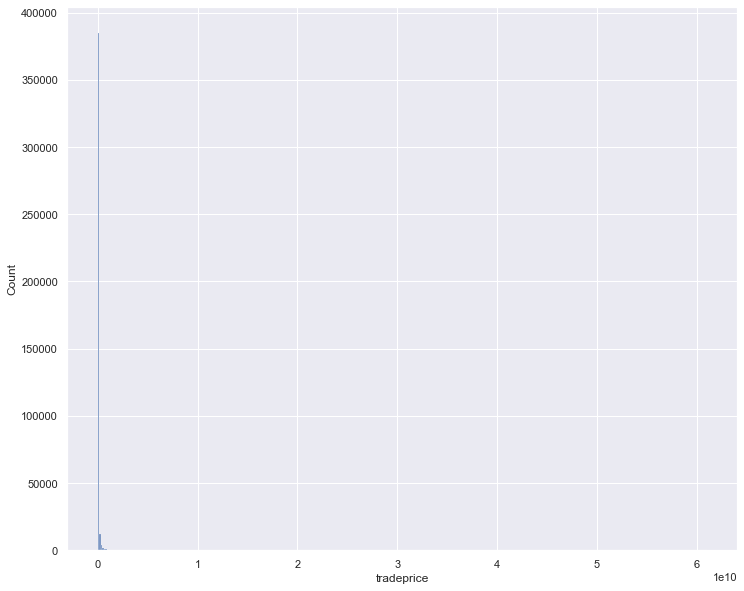

In [39]:
sns.histplot(df.tradeprice, bins=400)

<AxesSubplot:xlabel='tradeprice', ylabel='Count'>

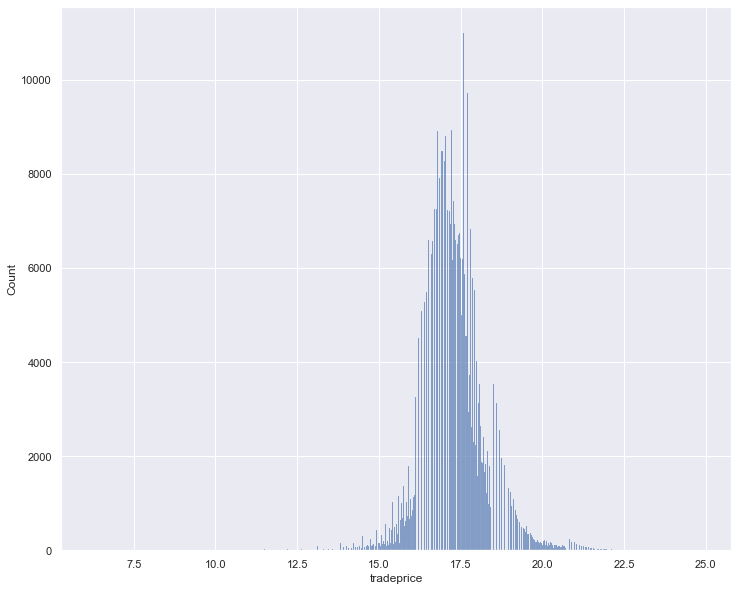

In [40]:
# as we have tail in data => apply log
log_price = np.log1p(df.tradeprice)
sns.histplot(log_price)

In [46]:
numerical = ['timetoneareststation', 'buildingyear', 'coverageratio', 'floorarearatio']

categorical = ['type', 'municipality', 'districtname', 'neareststation',
               'structure', 'use', 'cityplanning', 'municipalitycode']

In [47]:
# Let's observe corr for numerical
df[numerical].corrwith(df.tradeprice).to_frame('corr')

,corr
timetoneareststation,-0.036580
buildingyear,-0.034077
coverageratio,0.038186
floorarearatio,0.066120


In [48]:
# Let's observe degree of connection between categorical data
from sklearn.metrics import mutual_info_score

def calculate_MI(series):
    return mutual_info_score(series, df.tradeprice)

result_MI = df[categorical].apply(calculate_MI)

result = result_MI.sort_values(ascending=False).to_frame(name='Mut. info')

In [49]:
result

,Mut. info
districtname,0.487143
neareststation,0.335338
municipalitycode,0.131680
municipality,0.131680
type,0.111030
use,0.092259
structure,0.084677
cityplanning,0.055543


# 3.1 At first l'll do all by hands and then with sklearn.

# Validation

In [41]:
length = len(df)
test = int(length * 0.2)
valid = int(length * 0.2)
train = length - (test + valid)

np.random.seed(4)
index = np.arange(length)
np.random.shuffle(index)
df_mix = df.iloc[index]

df_train = df_mix.iloc[:train].copy()
df_valid = df_mix.iloc[train:train + valid].copy()
df_test = df_mix.iloc[train + valid:].copy()

len(df_train), len(df_valid), len(df_test)

(243945, 81315, 81315)

In [42]:
y_test = np.log1p(df_test.tradeprice.values)
y_valid = np.log1p(df_valid.tradeprice.values)
y_train = np.log1p(df_train.tradeprice.values)

del df_train['tradeprice']
del df_test['tradeprice']
del df_valid['tradeprice']

# Regression

In [43]:
def train_lienar_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [44]:
df_train.dtypes[df_train.dtypes != 'object']

municipalitycode         int64
timetoneareststation     int64
frontageisgreaterflag     bool
buildingyear             int64
coverageratio            int64
floorarearatio           int64
dtype: object

In [45]:
base = ['timetoneareststation', 'buildingyear', 'coverageratio', 'floorarearatio']

def prepare_data(data):
    X = data[base].values
    return X

In [46]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [47]:
X_train = prepare_data(df_train)
w0, w = train_lienar_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [48]:
# to evaluate various models we'll use rmse
rmse(y_train, y_pred)

0.9148707371339037

<AxesSubplot:ylabel='Count'>

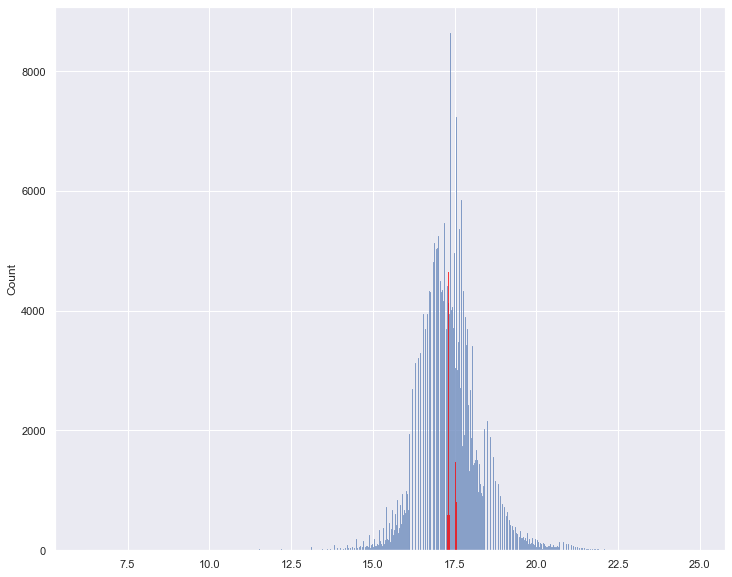

In [49]:
sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction', color='red')

In [50]:
X_valid = prepare_data(df_valid)
w0, w = train_lienar_regression(X_valid, y_valid)
y_pred = w0 + X_valid.dot(w)

In [51]:
rmse(y_valid, y_pred)

0.9181976951517435

<AxesSubplot:ylabel='Count'>

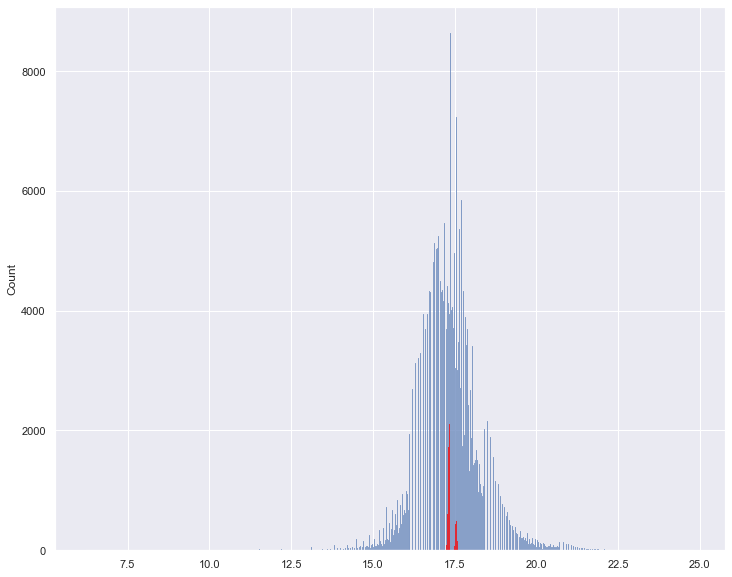

In [52]:
sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction', color='red')

# Feature engineering

In [53]:
# Let's try to add new columns + do so-called "one-hot encoding"

In [54]:
# we'll extract biggest numbers of categorical variables
# and do one-hot encoding

from datetime import datetime

def prepare_data_encoding(data):
    data = data.copy()
    features = base.copy()
    
    for i in [13112, 13111, 13120, 13121, 13115, 13119, 13201, 13108]:
        feature = 'municipality_code_%s' % i
        data[feature] = (data['municipalitycode'] == i).astype(int)
        features.append(feature)
    
    for i in ['pre-owned_condominiums', 'residential_land(land_and_building)', 'residential_land(land_only)',
              'forest_land', 'agricultural_land']:
        feature = 'type_%s' % i
        data[feature] = (data['type'] == i).astype(int)
        features.append(feature)
    
    for i in ['setagaya_ward', 'ota_ward', 'nerima_ward', 'adachi_ward', 'suginami_ward',
              'itabashi_ward', 'hachioji_city', 'koto_ward']:
        feature = 'municipality_%s' % i
        data[feature] = (data['municipality'] == i).astype(int)
        features.append(feature)
    
    for i in ['honcho', 'chuo', 'kameido', 'sakaecho', 'shimmachi',
              'ojima', 'nishishinjuku', 'minamioi']:
        feature = 'districtname_%s' % i
        data[feature] = (data['districtname'] == i).astype(int)
        features.append(feature)
    
    for i in ['hachioji', 'oizumigakuen', 'shinkoiwa', 'kanamachi', 'mitaka',
              'koiwa', 'ogikubo', 'musashikoganei']:
        feature = 'neareststation_%s' % i
        data[feature] = (data['neareststation'] == i).astype(int)
        features.append(feature)
    
    for i in ['rc', 'w', 'src', 's', 'ls', 'rc,_w', 's,_w', 'src,_rc']:
        feature = 'structure_%s' % i
        data[feature] = (data['structure'] == i).astype(int)
        features.append(feature)
    
    for i in ['house', 'housing_complex', 'house,_shop', 'office', 'shop',
              'housing_complex,_shop', 'office,_shop', 'house,_office']:
        feature = 'use_%s' % i
        data[feature] = (data['use'] == i).astype(int)
        features.append(feature)
    
    for i in ['category_i_exclusively_low-story_residential_zone', 'commercial_zone', 'category_i_exclusively_medium-high_residential_zone',
              'quasi-industrial_zone', 'category_i_residential_zone', 'neighborhood_commercial_zone',
              'category_ii_exclusively_medium-high_residential_zone', 'category_ii_residential_zone']:
        
        feature = 'cityplanning_%s' % i
        data[feature] = (data['cityplanning'] == i).astype(int)
        features.append(feature)
    
    
    X = data[features].values
    return X

In [55]:
X_valid = prepare_data_encoding(df_train)
w0, w = train_lienar_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
print('training:', rmse(y_train, y_pred))

X_valid = prepare_data_encoding(df_valid)
w0, w = train_lienar_regression(X_valid, y_valid)
y_pred = w0 + X_valid.dot(w)
print('validation:', rmse(y_valid, y_pred))

training: 0.9148707371339037
validation: 1430.7816324267746


# Regularization

In [56]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [57]:
X_train = prepare_data_encoding(df_train)
X_valid = prepare_data_encoding(df_valid)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_train.dot(w)
    print('training:', round(rmse(y_train, y_pred), 6))

print('Split')

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_valid, y_valid, r=r)
    y_pred = w0 + X_valid.dot(w)
    print('validation:', round(rmse(y_valid, y_pred), 6))  

training: 0.763409
training: 0.763409
training: 0.763409
training: 0.763409
training: 0.763409
training: 0.763412
training: 0.76347
training: 0.763594
Split
validation: 0.765232
validation: 0.765232
validation: 0.765232
validation: 0.765232
validation: 0.765232
validation: 0.765255
validation: 0.765555
validation: 0.766065


In [58]:
X_valid = prepare_data_encoding(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.0001)
y_pred = w0 + X_train.dot(w)
print('training:', rmse(y_train, y_pred))

X_valid = prepare_data_encoding(df_valid)
w0, w = train_linear_regression_reg(X_valid, y_valid, r=0.0001)
y_pred = w0 + X_valid.dot(w)
print('validation:', rmse(y_valid, y_pred))

training: 0.7634088169053568
validation: 0.7652318145542678


In [59]:
X_test = prepare_data_encoding(df_test)
w0, w = train_linear_regression_reg(X_test, y_test, r=0.0001)
y_pred = w0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

test: 0.7645848127297242


In [60]:
i = 5638
test_case = df.iloc[i].to_dict()
test_case

{'type': 'pre-owned_condominiums',
 'municipalitycode': 13102,
 'prefecture': 'tokyo',
 'municipality': 'chuo_ward',
 'districtname': 'hatchobori',
 'neareststation': 'hatchobori_(tokyo)',
 'timetoneareststation': 2,
 'tradeprice': 27000000,
 'frontageisgreaterflag': False,
 'buildingyear': 2005,
 'structure': 'rc',
 'use': 'house',
 'cityplanning': 'commercial_zone',
 'coverageratio': 80,
 'floorarearatio': 500}

In [61]:
X_test_case = prepare_data_encoding(df[test_case])[0]
y_pred = w0 + X_test_case.dot(w)
price = np.expm1(y_pred)

In [62]:
abs(price - 27000000)

70200.91037957743

In [63]:
price
# pretty accurate. Let's do sklearn variant

26929799.089620423

# 3.2 Now - sklearn

In [52]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

# Validation

In [110]:
full_train, full_test = train_test_split(df, test_size=0.2, random_state=4)
train, valid = train_test_split(full_train, test_size=0.33, random_state=2)

In [111]:
y_train_sk = np.log1p(train.tradeprice.values)
y_valid_sk = np.log1p(valid.tradeprice.values)

del train['tradeprice']
del valid['tradeprice']

In [112]:
numerical = ['timetoneareststation', 'buildingyear', 'coverageratio', 'floorarearatio']

categorical = ['type', 'municipality', 'districtname', 'neareststation',
               'structure', 'use', 'cityplanning', 'municipalitycode']

In [20]:
df.dtypes

type                      object
municipalitycode           int64
prefecture                object
municipality              object
districtname              object
neareststation            object
timetoneareststation      object
tradeprice                 int64
floorplan                 object
frontageisgreaterflag       bool
buildingyear             float64
structure                 object
use                       object
purpose                   object
cityplanning              object
coverageratio            float64
floorarearatio           float64
year                       int64
renovation                object
age                      float64
dtype: object

In [113]:
train_dict = train[numerical + categorical].to_dict(orient='records')

In [74]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [75]:
model = Ridge()
model.fit(X_train, y_train_sk)

Ridge()

In [76]:
valid_dict = valid[numerical + categorical].to_dict(orient='records')
X_valid = dv.transform(valid_dict)

In [77]:
y_pred = model.predict(X_valid)
y_pred

array([19.17932343, 17.99522683, 17.26699879, ..., 17.75590596,
       17.54498166, 17.60672858])

In [122]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [79]:
rmse(y_valid_sk, y_pred)

0.6903508542090744

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_test, y_pred, X_train):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    n = y_pred.shape[0]
    k = X_train.shape[1]
    
    adjusted = 1 - (1 - r2) * (n - 1) / (n - 1 - k)
    return rmse, r2, adjusted

In [81]:
metrics(y_valid_sk, y_pred, X_valid)

(0.6903508542090744, 0.4420570848909552, 0.42939951985413294)

# Retraining on full_train and checking
# => Final Model

In [114]:
y_full_train = np.log1p(full_train.tradeprice.values)

del full_train['tradeprice']

In [115]:
dv = DictVectorizer(sparse=False)

In [116]:
full_train_dict = full_train[numerical + categorical].to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

In [117]:
model = Ridge()
model.fit(X_full_train, y_full_train)

Ridge()

In [118]:
y_test_sk = np.log1p(full_test.tradeprice.values)

del full_test['tradeprice']

In [119]:
test_dict = full_test[numerical + categorical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [120]:
y_pred = model.predict(X_test)
y_pred

array([17.86144788, 17.71996961, 17.1776646 , ..., 16.4455537 ,
       17.07552902, 17.5633226 ])

In [123]:
rmse(y_test_sk, y_pred)

0.6896287639048331

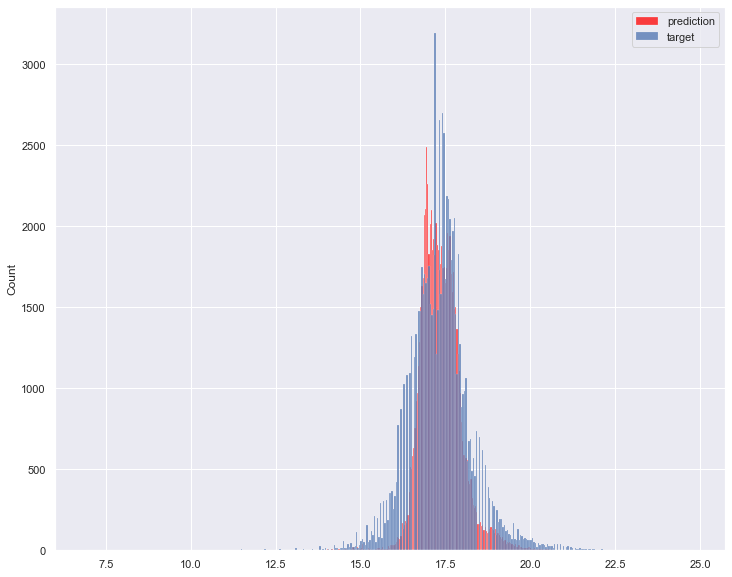

In [86]:
sns.histplot(y_pred, label='prediction', color='red')
sns.histplot(y_test_sk, label='target')
plt.legend()
plt.show()

# Let's test data from dataset to see how well prediction is done

In [125]:
full_test = full_test.reset_index(drop=True)

In [127]:
len(full_test)

81315

In [134]:
idx = 700
final_test = [full_test.iloc[idx].to_dict()]
final_test

[{'type': 'pre-owned_condominiums',
  'municipalitycode': 13111,
  'prefecture': 'tokyo',
  'municipality': 'ota_ward',
  'districtname': 'omorikita',
  'neareststation': 'omori_(tokyo)',
  'timetoneareststation': 6,
  'frontageisgreaterflag': False,
  'buildingyear': 2011,
  'structure': 'rc',
  'use': 'house',
  'cityplanning': 'commercial_zone',
  'coverageratio': 80,
  'floorarearatio': 500,
  'age': 10}]

In [135]:
X_test_result = dv.transform(final_test)
res = model.predict(X_test_result)[0]
price_prediction = np.expm1(res)

In [136]:
price_prediction

25600202.613610744

In [138]:
np.expm1(y_test_sk[700])

17999999.999999985

# Calculating fluctuations

In [55]:
import random

def get_random(start=2500, end=320000):
    return random.randint(start, end)

In [56]:
def calculate_difference(price, prediction):
    result = (prediction / price) * 100
    return round(result, 2)

In [57]:
def check_fluctuation(dv, model):
    
    all_data = {}

    # hasttable will 'eat-up' similar idx
    # hence we'll get only unqiue ones
    while len(all_data) != 20:
        random_idx = get_random()
        data = [df.iloc[random_idx].to_dict()]

        X_test_result = dv.transform(data)
        result = model.predict(X_test_result)[0]
        price_prediction = np.expm1(result)
        
        tradeprice = data[0].get('tradeprice')
        all_data[random_idx] = [tradeprice, round(price_prediction, 2),
                                calculate_difference(tradeprice, price_prediction)]
    
    total = []
    for value in all_data.values():
        total.append(value[2])
    
    overall_percentage = sum(total) / len(total)
    
    print(f"Overall percentage difference: {overall_percentage}")
    return all_data


In [63]:
check_fluctuation(dv, model)

Overall percentage difference: 174.051


{271975: [42000000, 22068083.69, 52.54],
 84481: [17000000, 20048218.95, 117.93],
 178666: [44000000, 23481104.8, 53.37],
 177151: [82000000, 40593869.9, 49.5],
 259653: [48000000, 44606768.28, 92.93],
 21290: [4000000, 41982614.55, 1049.57],
 231016: [17000000, 62554877.98, 367.97],
 6627: [29000000, 48850638.89, 168.45],
 204879: [6300000, 20785200.93, 329.92],
 156141: [20000000, 21777025.65, 108.89],
 216384: [32000000, 20851502.96, 65.16],
 89808: [30000000, 34502135.27, 115.01],
 167846: [15000000, 23496815.32, 156.65],
 114650: [78000000, 70574247.5, 90.48],
 318756: [46000000, 43306018.25, 94.14],
 316497: [47000000, 35363249.53, 75.24],
 178125: [37000000, 72891104.75, 197.0],
 54900: [22000000, 22498641.84, 102.27],
 122967: [43000000, 36992616.09, 86.03],
 150830: [54000000, 58305193.03, 107.97]}